In [ ]:
# reference url: https://www.datascience.com/blog/k-means-alternatives
# reference url: https://www.datascience.com/blog/common-machine-learning-business-applications
#data url: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers#


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
data = pd.read_csv("./Wholesale customers data.csv")
data.head() 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


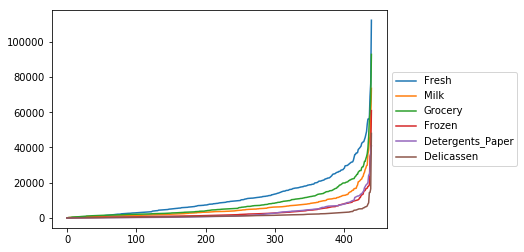

In [33]:
# kolon değerlerini büyüklüğüne göre sıralayarak görselleştirme
for c in range(2, data.columns.size):
    s = data.iloc[:, c].sort_values()
    plt.plot(range(len(s)),s,label=data.columns[c])
    plt.legend(loc='center left', bbox_to_anchor = (1.0, 0.5))

In [34]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [35]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


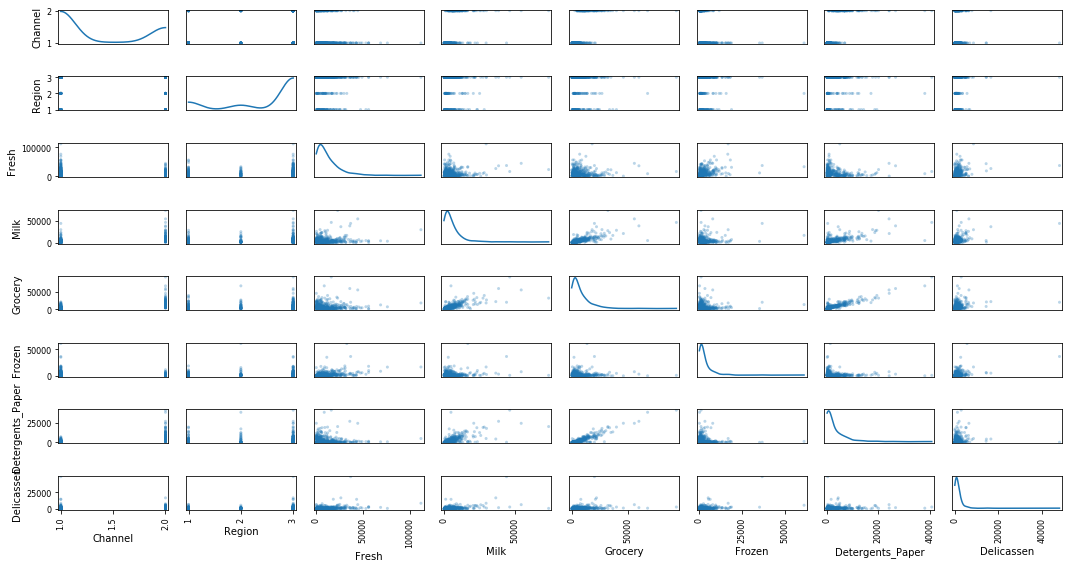

In [36]:
pd.plotting.scatter_matrix(data, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout() # To avoid overlapping of plots

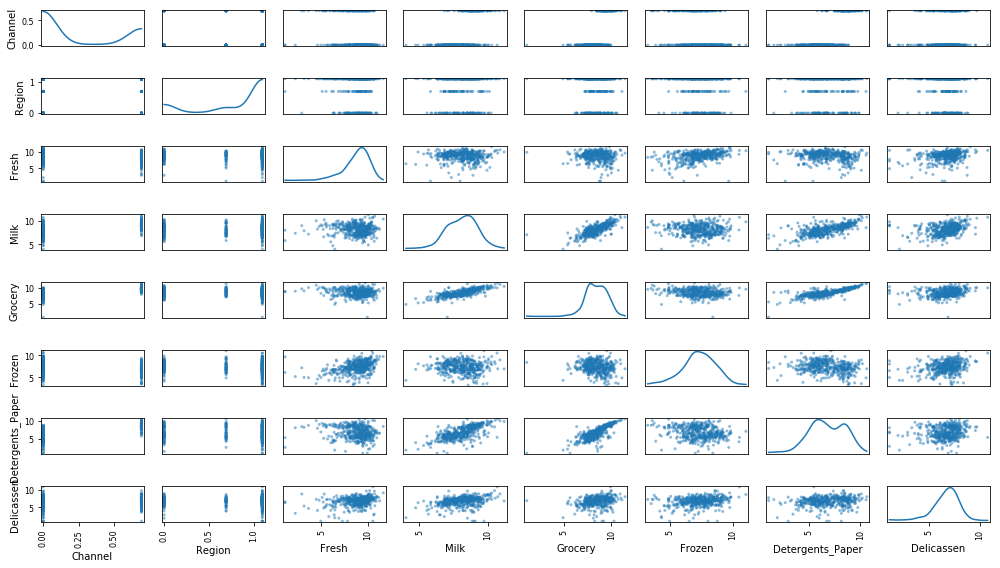

In [41]:
# Scale the data using the natural logarithm
log_data = np.log(data.copy())


# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha=0.5, figsize=(14,8),diagonal='kde')
plt.tight_layout()

In [43]:
# channel ve region kaldırılıyor
# müşterileri kategorilere ayırırken satış kanalı ile bölge bizim için şu an için önemsiz olacak.
data_1 = data.drop(['Channel', 'Region'], axis = 1)
data_1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [55]:
# burada bir tane özelliği diğerlerinden çıkarmayı test edeceğiz.

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
targ_feature = data_1['Detergents_Paper']
new_data = data_1.drop(['Detergents_Paper'], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data, targ_feature, test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
score

0.7286551812541454

In [81]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
targ_feature = data_1['Detergents_Paper']
#'Detergents_Paper', 'Delicassen', 'Milk', 'Fresh', 'Frozen', 'Grocery'
new_data = data_1.drop(['Detergents_Paper', 'Delicassen', 'Fresh', 'Frozen'], axis = 1)

new_data.head()
# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data, targ_feature, test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)
new_data.head()

0.6163733264701171


,Milk,Grocery
0,9656,7561
1,9810,9568
2,8808,7684
3,1196,4221
4,5410,7198


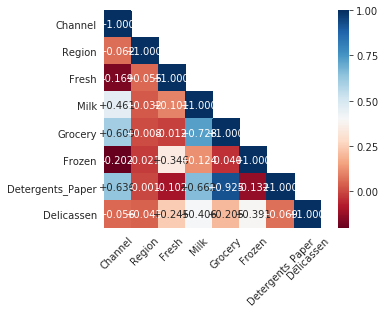

In [80]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

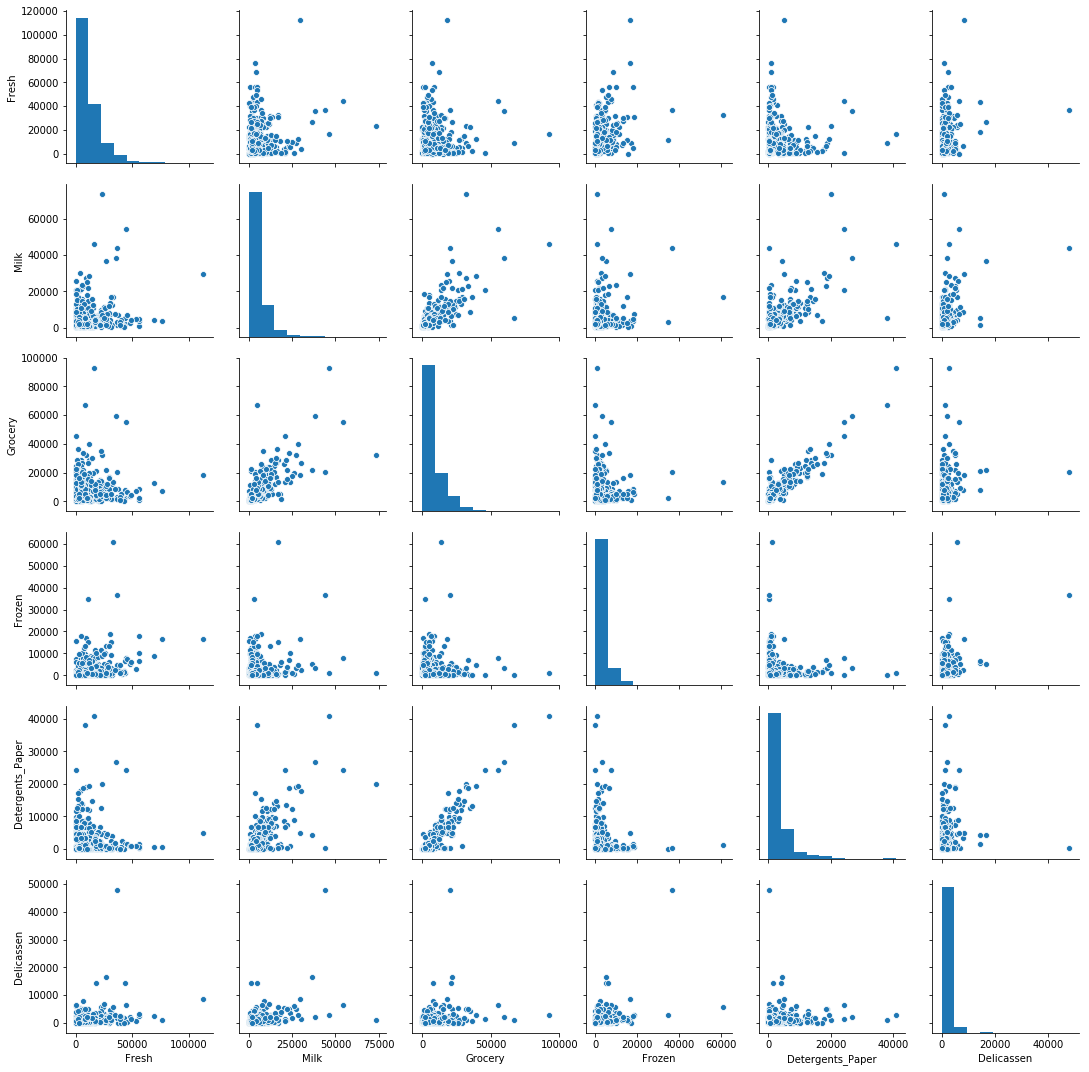

In [82]:
sns.pairplot(data_1)

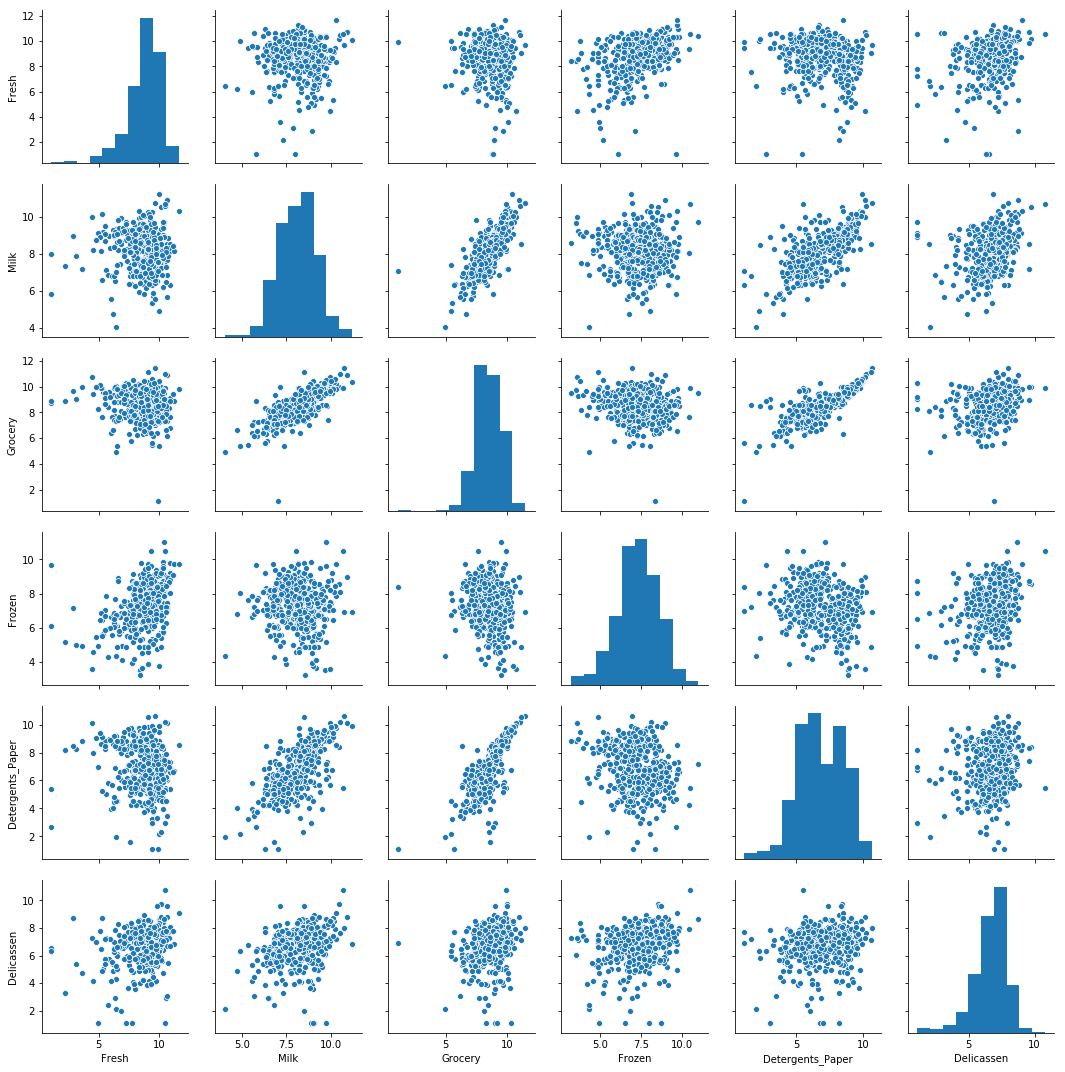

In [135]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data_1)


# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data)

In [169]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x = StandardScaler().fit_transform(data_1.values)

/Users/yildizib/.virtualenv/data-science-py3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/yildizib/.virtualenv/data-science-py3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [170]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [210]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [211]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  ])

In [212]:
principalDf

,0,1
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434
5,-0.156170,-0.295141
6,-0.335288,-0.525003
7,0.140586,-0.230993
8,-0.517320,-0.659363
9,1.592109,-0.741011


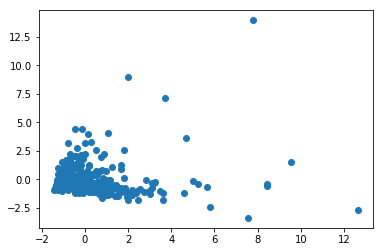

In [214]:
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1])


In [215]:
percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))

[0.44082893 0.283764  ]
0.72459292407745


In [216]:
principalDf

,0,1
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434
5,-0.156170,-0.295141
6,-0.335288,-0.525003
7,0.140586,-0.230993
8,-0.517320,-0.659363
9,1.592109,-0.741011
